In [11]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
# inspired by : 
# https://github.com/tensorflow/examples/blob/29f3cb71b31f32737907536a3ee9223a6970e68c/lite/examples/speech_commands/ml/download.py
# tutorial at: https://github.com/tensorflow/docs/blob/master/site/en/r1/tutorials/sequences/audio_recognition.md

In [7]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=643f26d0f6faf4a86b0cfd452913eb2e7475ba56c976843c45463e9b7420f3c7
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [8]:
import os
import wget
import tarfile


In [5]:
os.mkdir('/gdrive/My Drive/sound_commands')

FileExistsError: ignored

In [12]:
os.chdir('/gdrive/My Drive/sound_commands')

In [7]:
DATASET_URL = 'http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz'


In [ ]:
wget.download(DATASET_URL)

'speech_commands_v0.01.tar.gz'

In [8]:
ARCHIVE = os.path.basename(DATASET_URL)

In [ ]:
with tarfile.open(ARCHIVE, 'r:gz') as tar:
  tar.extractall(path='data/train')

os.remove(ARCHIVE)

In [9]:
!ls data/train

_background_noise_  five     marvin	right		  tree
bed		    four     nine	seven		  two
bird		    go	     no		sheila		  up
cat		    happy    off	six		  validation_list.txt
dog		    house    on		stop		  wow
down		    left     one	testing_list.txt  yes
eight		    LICENSE  README.md	three		  zero


let's take bed, bird, and tree.

In [12]:
!pip install librosa

In [13]:
!ls -1 data/train/bed | wc -l

1713


In [14]:
import librosa
x, sr  = librosa.load('data/train/bed/58df33b5_nohash_0.wav')

In [ ]:
import IPython.display as ipd
ipd.Audio(x, rate=sr)

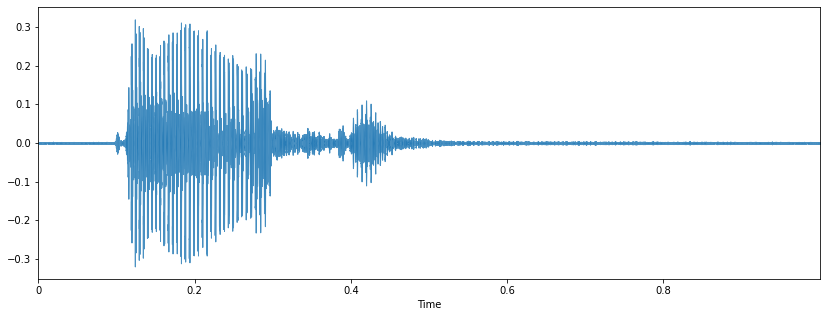

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.8)  # also called pressure-time plot

In [ ]:
x.shape

(22050,)

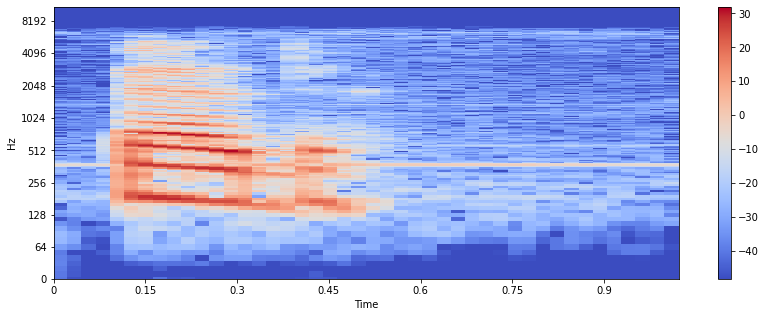

In [ ]:
X = librosa.stft(x)  # short-term fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [20]:
from tqdm.notebook import tqdm

def vectorize_directory(dirpath, label=0):
  features = []
  labels = [0]
  files = os.listdir(dirpath)
  for filename in tqdm(files):
    x, _ = librosa.load(
        os.path.join(dirpath, filename)
    )
    features.append(x)
  return features, [label] * len(features)

features, labels = vectorize_directory('data/train/bed/')

In [21]:
f, l = vectorize_directory('data/train/bird/', 1)
features.extend(f)
labels.extend(l)
f, l = vectorize_directory('data/train/tree/', 2)
features.extend(f)
labels.extend(l)

In [26]:
import pickle
pickle.dump([features, labels], open('dataset.pickle', 'wb'))

In [13]:
import pickle
features, labels = pickle.load(open('dataset.pickle', 'rb'))

In [14]:
len(features)

5177

In [15]:
features[0]

array([-0.00528411, -0.00746143, -0.00939442, ..., -0.00819206,
       -0.00954113, -0.00630831], dtype=float32)

(array([1.000e+00, 2.000e+00, 6.000e+00, 0.000e+00, 8.000e+00, 7.000e+00,
        5.000e+00, 1.600e+01, 1.600e+01, 2.000e+01, 1.800e+01, 4.900e+01,
        2.900e+01, 5.100e+01, 8.600e+01, 4.300e+01, 5.200e+01, 1.250e+02,
        6.000e+00, 4.637e+03]),
 array([ 9409.  , 10041.05, 10673.1 , 11305.15, 11937.2 , 12569.25,
        13201.3 , 13833.35, 14465.4 , 15097.45, 15729.5 , 16361.55,
        16993.6 , 17625.65, 18257.7 , 18889.75, 19521.8 , 20153.85,
        20785.9 , 21417.95, 22050.  ]),
 <a list of 20 Patch objects>)

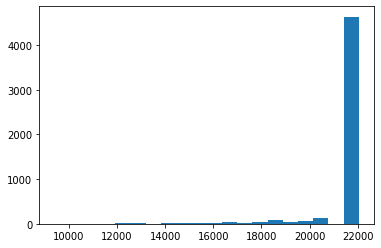

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist([f.shape[0] for f in features], bins=20)

In [17]:
indexes = [i for i, f in enumerate(features) if f.shape[0] >= 22050]
features = [f for i, f in enumerate(features) if i in indexes]
labels = [f for i, f in enumerate(labels) if i in indexes]

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 4526.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([22049.5 , 22049.55, 22049.6 , 22049.65, 22049.7 , 22049.75,
        22049.8 , 22049.85, 22049.9 , 22049.95, 22050.  , 22050.05,
        22050.1 , 22050.15, 22050.2 , 22050.25, 22050.3 , 22050.35,
        22050.4 , 22050.45, 22050.5 ]),
 <a list of 20 Patch objects>)

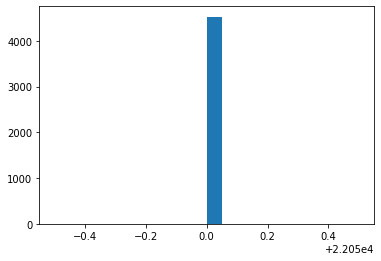

In [18]:
plt.hist([f.shape[0] for f in features], bins=20)

In [19]:
import numpy as np

features = np.concatenate([f.reshape(1, -1) for f in features], axis=0)

In [20]:
features.shape

(4526, 22050)

In [21]:
labels = np.array(labels)

In [22]:
classes = ['bed', 'bird', 'tree']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  features, labels, test_size=0.33, random_state=42
)

In [24]:
X_train.shape

(3032, 22050)

In [93]:
import tensorflow.keras as keras
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K


def preprocess(x):
    x = (x + 0.8) / 7.0
    x = K.clip(x, -5, 5)
    return x

def relu6(x):
    return K.relu(x, max_value=6)

Preprocess = Lambda(preprocess)

def conv_layer(x, num_filters=100, k=3, strides=2):
    x = Conv1D(
          num_filters,
          (k),
          padding='valid',
          use_bias=False,
          kernel_regularizer=l2(1e-6)
        )(x)
    x = BatchNormalization()(x)
    x = Activation(relu6)(x)
    x = MaxPool1D(pool_size=num_filters, strides=None, padding='valid')(x)
    return x

def create_model(classes, nlayers=1, filters=100, k=100):
    input_layer = Input(shape=[features.shape[1]])
    x = Preprocess(input_layer)
    x = Reshape([features.shape[1], 1])(x)
    for _ in range(nlayers):
        x = conv_layer(x, num_filters=filters, k=k)
        x = Reshape([219 * filters])(x)
        x = Dense(
            units=len(classes), activation='softmax',
            kernel_regularizer=l2(1e-2)
        )(x)
    model = Model(input_layer, x, name='conv1d_sound')
    model.compile(
        optimizer=keras.optimizers.Adam(lr=3e-4),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.sparse_categorical_accuracy])
    model.summary()
    return model

model = create_model(classes)


Model: "conv1d_sound"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        [(None, 22050)]           0         
_________________________________________________________________
lambda_44 (Lambda)           (None, 22050)             0         
_________________________________________________________________
reshape_86 (Reshape)         (None, 22050, 1)          0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 21951, 100)        10000     
_________________________________________________________________
batch_normalization_43 (Batc (None, 21951, 100)        400       
_________________________________________________________________
activation_43 (Activation)   (None, 21951, 100)        0         
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 219, 100)         

In [94]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
95/95 [==============================] - 18s 189ms/step - loss: 0.9745 - sparse_categorical_accuracy: 0.6052
Epoch 2/30
95/95 [==============================] - 18s 187ms/step - loss: 0.6555 - sparse_categorical_accuracy: 0.8001
Epoch 3/30
95/95 [==============================] - 18s 187ms/step - loss: 0.5567 - sparse_categorical_accuracy: 0.8318
Epoch 4/30
95/95 [==============================] - 18s 186ms/step - loss: 0.5076 - sparse_categorical_accuracy: 0.8572
Epoch 5/30
95/95 [==============================] - 18s 186ms/step - loss: 0.4726 - sparse_categorical_accuracy: 0.8724
Epoch 6/30
95/95 [==============================] - 18s 186ms/step - loss: 0.4652 - sparse_categorical_accuracy: 0.8766
Epoch 7/30
95/95 [==============================] - 18s 186ms/step - loss: 0.4396 - sparse_categorical_accuracy: 0.8839
Epoch 8/30
95/95 [==============================] - 18s 186ms/step - loss: 0.4321 - sparse_categorical_accuracy: 0.8859
Epoch 9/30
95/95 [======================

In [95]:
import sklearn

predicted = model.predict(X_test)
print('accuracy: {:.3f}'.format(
    sklearn.metrics.accuracy_score(y_test, predicted.argmax(axis=1))
))

accuracy: 0.805890


(array([479.,   0.,   0.,   0.,   0., 541.,   0.,   0.,   0., 474.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

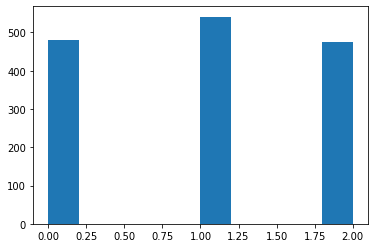

In [106]:
plt.hist(predicted.argmax(axis=1))

(array([1484.,    0.,    0.,    0.,    0., 1521.,    0.,    0.,    0.,
        1521.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

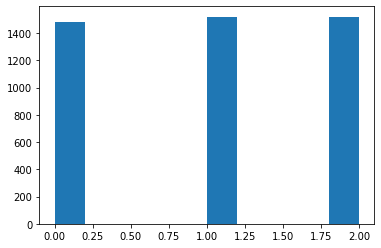

In [103]:
plt.hist(labels)